In [4]:
import os

folder_path = "../Datasets/SROIE_YOLO_TRAIN/val/images"

count = sum(1 for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)))
print("Số file trong thư mục:", count)


Số file trong thư mục: 126



===== LOAD MODEL: receipt_yolov9c_finetune =====
  -> Test ảnh: X00016469670.jpg

image 1/1 D:\ADMIN\Documents\Classwork\advance_cv_project\SROIE2019\test\img\X00016469670.jpg: 1024x544 46 Texts, 944.5ms
Speed: 8.6ms preprocess, 944.5ms inference, 8.3ms postprocess per image at shape (1, 3, 1024, 544)


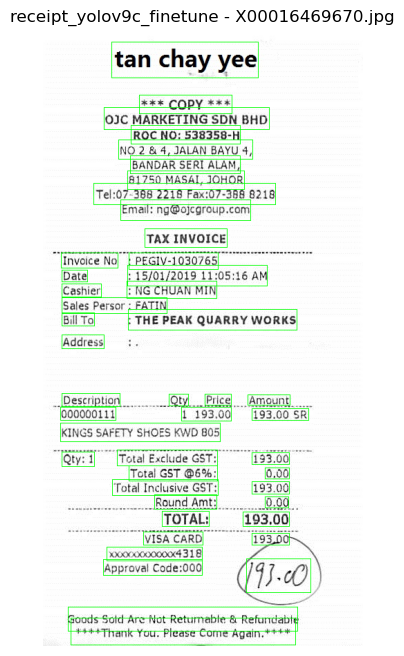

  -> Test ảnh: X00016469671.jpg

image 1/1 D:\ADMIN\Documents\Classwork\advance_cv_project\SROIE2019\test\img\X00016469671.jpg: 1024x640 42 Texts, 1210.3ms
Speed: 9.7ms preprocess, 1210.3ms inference, 6.7ms postprocess per image at shape (1, 3, 1024, 640)


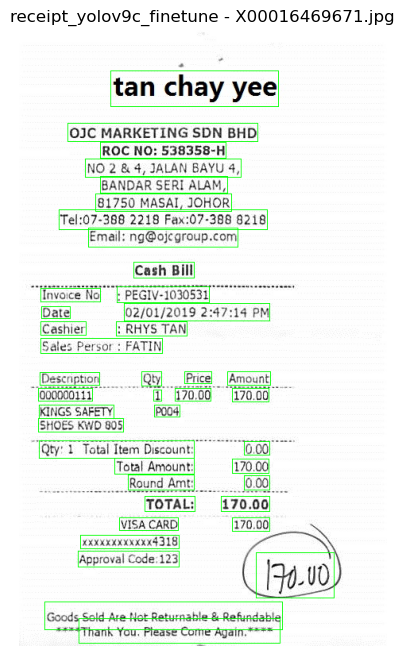


===== LOAD MODEL: sroie_yolov8m_finetune =====
  -> Test ảnh: X00016469670.jpg

image 1/1 D:\ADMIN\Documents\Classwork\advance_cv_project\SROIE2019\test\img\X00016469670.jpg: 1024x544 45 Texts, 683.3ms
Speed: 5.7ms preprocess, 683.3ms inference, 6.1ms postprocess per image at shape (1, 3, 1024, 544)


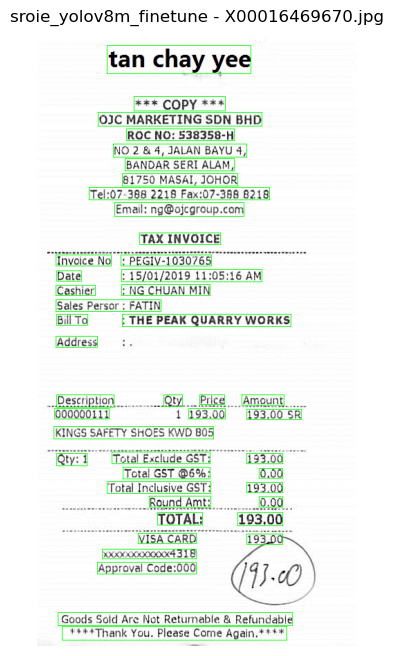

  -> Test ảnh: X00016469671.jpg

image 1/1 D:\ADMIN\Documents\Classwork\advance_cv_project\SROIE2019\test\img\X00016469671.jpg: 1024x640 41 Texts, 803.9ms
Speed: 8.7ms preprocess, 803.9ms inference, 6.3ms postprocess per image at shape (1, 3, 1024, 640)


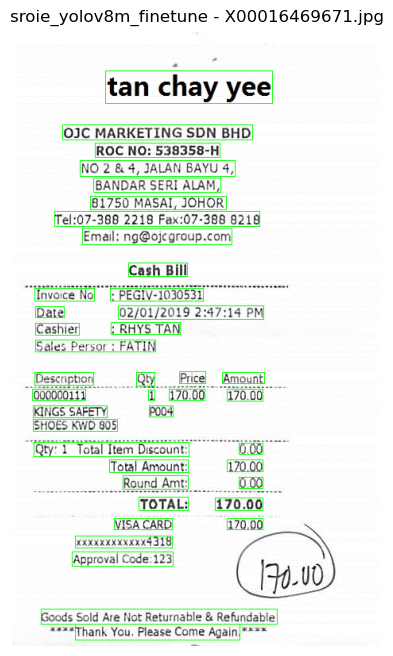

In [3]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

MODEL_LIST = {
    "receipt_yolov9c_finetune": r"D:\ADMIN\Documents\Classwork\advance_cv_project\train\runs\detect\receipt_yolov9c_finetune\weights\best.pt",
    "sroie_yolov8m_finetune": r"D:\ADMIN\Documents\Classwork\advance_cv_project\train\runs\detect\sroie_yolov8m_finetune\weights\best.pt"
}

IMAGE_LIST = [
    r"D:\ADMIN\Documents\Classwork\advance_cv_project\SROIE2019\test\img\X00016469670.jpg",
    r"D:\ADMIN\Documents\Classwork\advance_cv_project\SROIE2019\test\img\X00016469671.jpg"
]

def draw_boxes_minimal(image, results):
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
    return image

for model_name, model_path in MODEL_LIST.items():
    print(f"\n===== LOAD MODEL: {model_name} =====")
    model = YOLO(model_path)

    for img_path in IMAGE_LIST:
        print(f"  -> Test ảnh: {os.path.basename(img_path)}")
        results = model.predict(source=img_path, save=False, conf=0.4)
        image = cv2.imread(img_path)
        image = draw_boxes_minimal(image, results)

        # Chuyển BGR → RGB để matplotlib hiển thị đúng màu
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 8))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(f"{model_name} - {os.path.basename(img_path)}")
        plt.show()
